In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


white_wine_path = 'resources/wineQualityWhites.csv'
red_wine_path = 'resources/wineQualityReds.csv'

In [2]:
df_white = pd.read_csv(white_wine_path)
df_white.head(3)

,ID.white,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [3]:
df_red = pd.read_csv(red_wine_path)
df_red.head(3)

,ID.red,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


### Data Exploration

In [4]:
# Drop ID colmns
df_white.drop(columns='ID.white', inplace=True)
df_red.drop(columns='ID.red', inplace=True)

# Add type columns for red or wite wine red=0, white=1
df_white['type'] = 1
df_red['type'] = 0

# Create one dataframe for all wine data

df_wine = df_white
df_wine.append(df_red, ignore_index=True)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [5]:
# No null values in either dataset
#df_red.isnull().sum()

df_white.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [6]:
# There are over 3x more datapoints for white wines than red

print('White shape: ', df_white.shape)
print('Red shape: ', df_red.shape)

White shape:  (4898, 13)
Red shape:  (1599, 13)


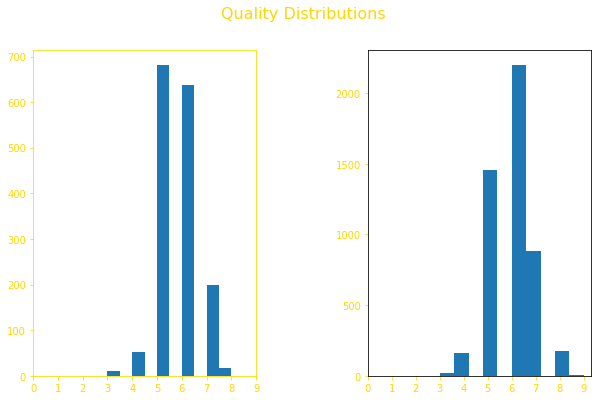

In [28]:
# Wine Quality vs Type

# Make plots


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
fig.suptitle('Quality Distributions', color='gold', size=16)
ax1.hist(df_red['quality'])
ax2.hist(df_white['quality'])


# Set color
axs=[ax1, ax2]

for ax in axs:
    ax.set_xticks(np.arange(0, 10, step=1))
    ax.tick_params(color='gold', labelcolor='gold')
    for spine in ax1.spines.values():
        spine.set_edgecolor('gold')


fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=None)
plt.show()